In [1]:
import geopandas as gpd
from rasterio.enums import Resampling
from shapely.geometry import CAP_STYLE, JOIN_STYLE, shape

import geowombat as gw
from geowombat.core.stac import (
    STAC_CATALOGS,
    STAC_COLLECTIONS,
    STACCollections,
    STACNames,
    open_stac,
)

In [6]:
geojson = {
    "type": "Polygon",
    "coordinates": [
        [
            [12.489159107208252, 41.88771017105127],
            [12.49619722366333, 41.88771017105127],
            [12.49619722366333, 41.8920390506062],
            [12.489159107208252, 41.8920390506062],
            [12.489159107208252, 41.88771017105127],
        ]
    ],
}

epsg = 8857
df = gpd.GeoDataFrame(geometry=[shape(geojson)], crs=4326)
search_df = (
    df.to_crs(f'epsg:{epsg}')
    .buffer(100, cap_style=CAP_STYLE.square, join_style=JOIN_STYLE.mitre)
    .to_crs('epsg:4326')
    .to_frame(name='geometry')
)

In [17]:
stack, out_df = open_stac(
    stac_catalog='element84_v1',
    bounds=search_df,
    proj_bounds=tuple(
        df.to_crs(f'epsg:{epsg}').total_bounds.flatten().tolist()
    ),
    epsg=epsg,
    collection='landsat_c2_l2',
    bands=['blue', 'green', 'red'],
    cloud_cover_perc=90,
    chunksize=64,
    start_date='2022-07-01',
    end_date='2022-07-21',
    resolution=10.0,
    nodata_fill=32768,
    resampling=Resampling.nearest,
    max_items=None,
    view_asset_keys=True
)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key                 ┃ Description                                                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ thumbnail                 │ Thumbnail image                                                  │
│ reduced_resolution_browse │ Reduced resolution browse image                                  │
│ mtl.json                  │ Product Metadata File (json)                                     │
│ mtl.txt                   │ Product Metadata File (txt)                                      │
│ mtl.xml                   │ Product Metadata File (xml)                                      │
│ ang                       │ Angle Coefficients File                                          │
│ qa_pixel                  │ Pixel Quality Assessment Band                                    │
│ qa_radsat                 │ Radiometric Saturation and Dropped Pixel Quality Assessment Band │
│ blue                      │ Blue Band                                                        │
│ green                     │ Green Band                                                       │
│ red                       │ Red Band                                                         │
│ nir08                     │ Near Infrared Band 0.8                                           │
│ swir16                    │ Short-wave Infrared Band 1.6                                     │
│ swir22                    │ Short-wave Infrared Band 2.2                                     │
│ atmos_opacity             │ Atmospheric Opacity Band                                         │
│ cloud_qa                  │ Cloud Quality Assessment Band                                    │
│ lwir                      │ Surface Temperature Band                                         │
│ atran                     │ Atmospheric Transmittance Band                                   │
│ cdist                     │ Cloud Distance Band                                              │
│ drad                      │ Downwelled Radiance Band                                         │
│ urad                      │ Upwelled Radiance Band                                           │
│ trad                      │ Thermal Radiance Band                                            │
│ emis                      │ Emissivity Band                                                  │
│ emsd                      │ Emissivity Standard Deviation Band                               │
│ qa                        │ Surface Temperature Quality Assessment Band                      │
└───────────────────────────┴──────────────────────────────────────────────────────────────────┘

In [12]:
stack

<xarray.DataArray 'stackstac-a04e5cf313d6902b0b87f25c77902010' (time: 8,
                                                                band: 3, y: 48,
                                                                x: 64)>
dask.array<where, shape=(8, 3, 48, 64), dtype=float64, chunksize=(1, 1, 48, 64), chunktype=numpy.ndarray>
Coordinates: (12/54)
  * time                                     (time) datetime64[ns] 2022-07-04...
    id                                       (time) <U24 'S2A_32TQM_20220704_...
  * band                                     (band) <U5 'blue' 'green' 'red'
  * x                                        (x) float64 1.048e+06 ... 1.049e+06
  * y                                        (y) float64 5.13e+06 ... 5.13e+06
    s2:datatake_type                         <U8 'INS-NOBS'
    ...                                       ...
    proj:shape                               object {10980}
    raster:bands                             object {'nodata': 0, 'data_type'...
    common_name                              (band) <U5 'blue' 'green' 'red'
    center_wavelength                        (band) float64 0.49 0.56 0.665
    full_width_half_max                      (band) float64 0.098 0.045 0.038
    epsg                                     int64 8857
Attributes:
    spec:        RasterSpec(epsg=8857, bounds=(1048480.0, 5129990.0, 1049120....
    crs:         epsg:8857
    transform:   | 10.00, 0.00, 1048480.00|\n| 0.00,-10.00, 5130470.00|\n| 0....
    resolution:  10.0
    res:         (10.0, 10.0)
    collection:  sentinel_s2_l2a
    nodatavals:  (32768, 32768, 32768)
    _FillValue:  32768

In [ ]:
stack, out_df = open_stac(
    stac_catalog='element84_v0',
    bounds=search_df,
    proj_bounds=tuple(
        df.to_crs(f'epsg:{epsg}').total_bounds.flatten().tolist()
    ),
    epsg=epsg,
    collection='sentinel_s2_l2a_cogs',
    bands=['B02', 'B03', 'B04'],
    cloud_cover_perc=90,
    chunksize=64,
    start_date='2022-07-01',
    end_date='2022-07-21',
    resolution=10.0,
    nodata_fill=32768,
    resampling=Resampling.nearest,
    max_items=None,
)

In [ ]:
(
    stack
    .groupby('time')
    .mean()
    .mean(dim='time', skipna=True)
).gw.imshow(robust=True)

In [2]:
epsg = 8858
search_df = gpd.read_file('data/il.geojson')

### Sentinel 1

In [3]:
stack, out_df = open_stac(
    stac_catalog='element84_v1',
    bounds=search_df,
    proj_bounds=tuple(
        search_df.to_crs(f'epsg:{epsg}').total_bounds.flatten().tolist()
    ),
    epsg=epsg,
    collection='sentinel_s1_l1c',
    bands=['vh', 'vv'],
    chunksize=64,
    start_date='2022-07-01',
    end_date='2022-08-01',
    resolution=30.0,
    nodata_fill=32768,
    resampling=Resampling.nearest,
    max_items=None,
    view_asset_keys=False,
)

In [5]:
import rasterio as rio
import dask
aws_session = rio.session.AWSSession(aws_unsigned=True, requester_pays=False)
with rio.Env(aws_session):
    with dask.config.set(scheduler='single-threaded'):
        stack = stack.compute()

RuntimeError: Error opening 's3://sentinel-s1-l1c/GRD/2022/7/1/IW/DV/S1A_IW_GRDH_1SDV_20220701T235717_20220701T235742_043914_053E0C_D61F/measurement/iw-vh.tiff': RasterioIOError('Access Denied')

In [7]:
rvi = (4.0 * stack.sel(band='vh')) / (stack.sel(band='vh') + stack.sel(band='vv'))

RuntimeError: Error opening 's3://sentinel-s1-l1c/GRD/2022/7/1/IW/DV/S1A_IW_GRDH_1SDV_20220701T235717_20220701T235742_043914_053E0C_D61F/measurement/iw-vv.tiff': RasterioIOError('Connection timed out after 1000 milliseconds')

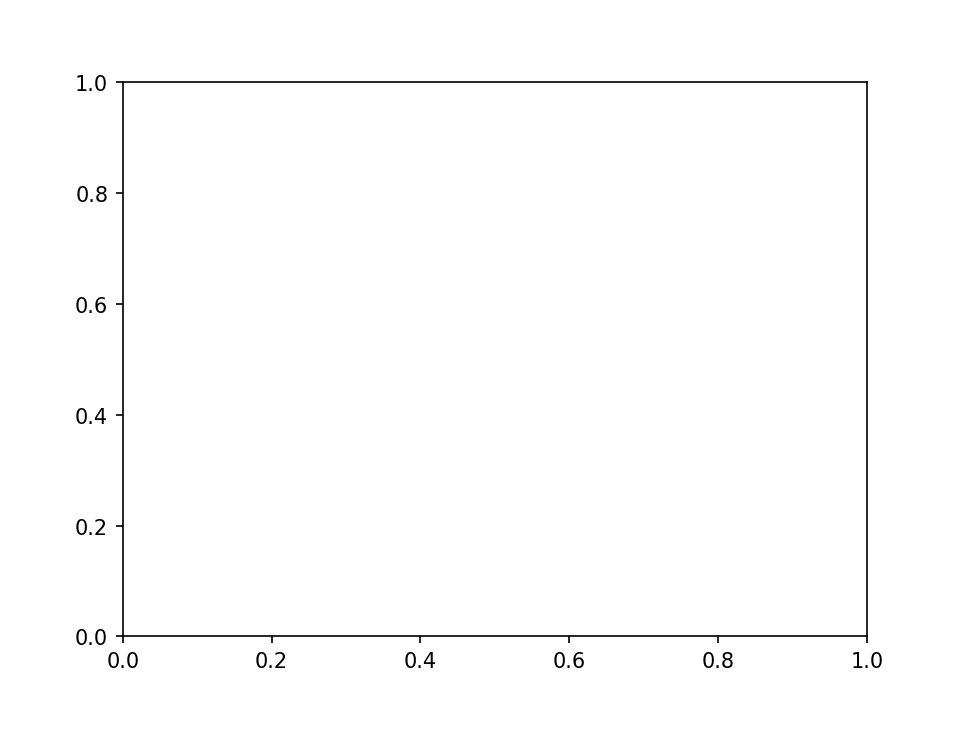

In [15]:
rvi.drop('band').rename({'time': 'band'}).gw.imshow(robust=True)

### USDA CDL

In [40]:
stack, out_df = open_stac(
    stac_catalog='microsoft',
    bounds=search_df,
    proj_bounds=tuple(
        search_df.to_crs(f'epsg:{epsg}').total_bounds.flatten().tolist()
    ),
    epsg=epsg,
    collection='usda_cdl',
    bands=['cropland'],
    chunksize=64,
    start_date='2016-01-01',
    end_date='2018-01-01',
    resolution=30.0,
    nodata_fill=32768,
    resampling=Resampling.nearest,
    max_items=None,
    view_asset_keys=False,
)

In [41]:
stack

<xarray.DataArray 'stackstac-a065adc9f0661a6c90609b34645567f7' (time: 3,
                                                                band: 1,
                                                                y: 329, x: 392)>
dask.array<where, shape=(3, 1, 329, 392), dtype=float64, chunksize=(1, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates: (12/13)
  * time            (time) datetime64[ns] NaT NaT NaT
    id              (time) <U34 'cropland_2018_433905_2002575_90000' ... 'cro...
  * band            (band) <U8 'cropland'
  * x               (x) float64 -5.103e+04 -5.1e+04 ... -3.933e+04 -3.93e+04
  * y               (y) float64 5.012e+06 5.012e+06 ... 5.003e+06 5.003e+06
    proj:transform  object {0.0, -30.0, 2002605.0, 433905.0, 30.0}
    ...              ...
    proj:shape      object {3000}
    proj:epsg       int64 5070
    usda_cdl:type   <U8 'cropland'
    end_datetime    (time) <U20 '2018-12-31T23:59:59Z' ... '2016-12-31T23:59:...
    raster:bands    object {'nodata': 0, 'data_type': 'uint8', 'spatial_resol...
    epsg            int64 8858
Attributes:
    spec:        RasterSpec(epsg=8858, bounds=(-51030.0, 5002560.0, -39270.0,...
    crs:         epsg:8858
    transform:   | 30.00, 0.00,-51030.00|\n| 0.00,-30.00, 5012430.00|\n| 0.00...
    resolution:  30.0
    res:         (30.0, 30.0)
    collection:  usda_cdl
    nodatavals:  (32768,)
    _FillValue:  32768

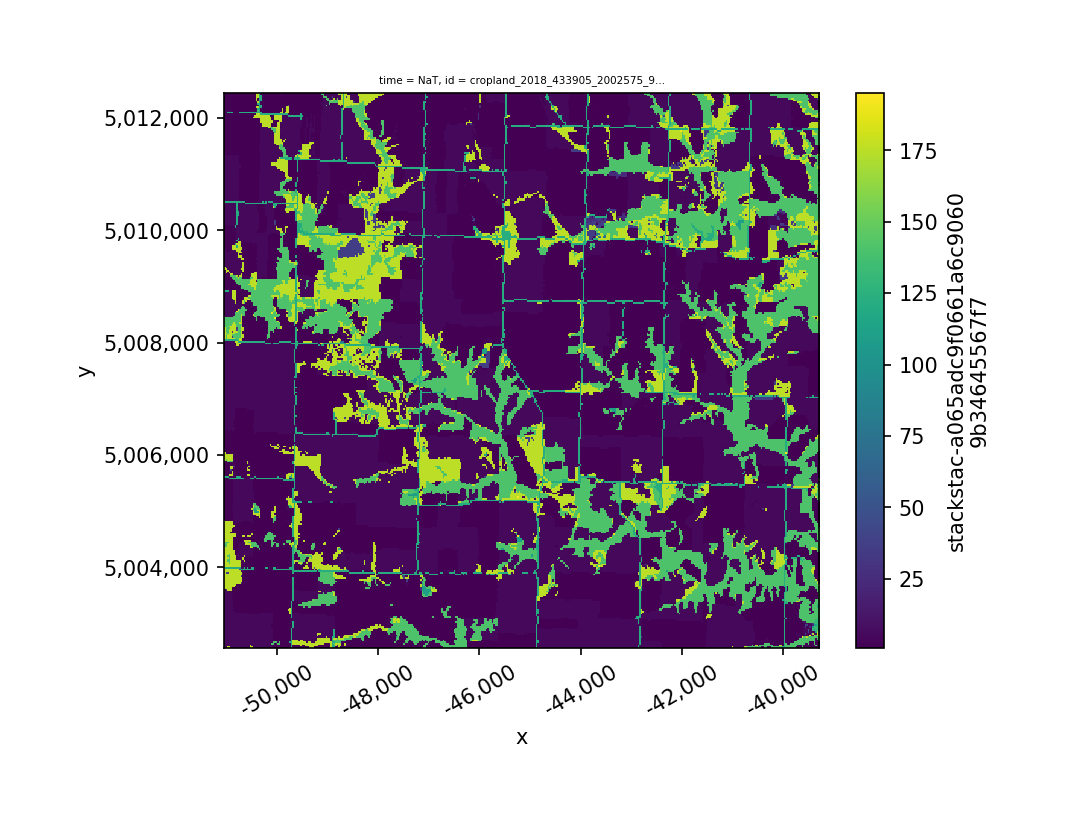

In [43]:
stack.isel(time=0).gw.imshow()